# SPRINT N°1
* Fecha de inicio: 25/11/2024
* Fecha de presentación: 2/12/2024

## DATA CLEANING

### NOS PONEMOS DE ACUERDO

**Renombre de columnas**
 * default = is_in_default ✅

 * #day = last_day ❌
 * #month = last_month ❌

**Renombre de filas**
 * yes = 1 ✅
 * no = 0 ✅

 * contact: 2347 id en 'Unknown'❌
 * education: 496 id en 'Unknown'❌ 
 * poutcome: 8327 id en 'Unknown'❌
 * balance: 774 id en "0". ❌
 * last_month = "jan" -> "1" ❌
 * job -> "admin.","blue-collar" ❌

 **Espacios**
 * Evaluar si hay espacios en blanco con función trim() ✅ (Utilizé replace)

**Duplicados**
 * No hay valores duplicados ✅

 **Nulls:**
* Marital: 5 Nulls
  * Propuesta: Usar la moda con respecto a "age" ✅

* age: 10 Nulls 
  * Propuesta: Usar la media de los "marital" ✅

* education: 7 Nulls
  * Propuesta: Usar la moda con respecto a "job" ✅


### LIBRERÍAS

In [2]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### CONEXIÓN

In [3]:
EquipC = pymysql.connect(
  host= "212.227.90.6",
  user="EquipoC",
  password="E1q2u3i4p5oC",
  database="EquipC"
)
print(EquipC)

In [4]:
mycursor = EquipC.cursor()
mycursor.execute("SELECT DATABASE()")
current_db = mycursor.fetchone()
print("Base de datos actual:", current_db)
mycursor.execute("SHOW TABLES")

Base de datos actual: ('EquipC',)


1

In [5]:
mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)

('BANK_marketing',)


In [6]:
BANK_marketing = 'SELECT * FROM BANK_marketing'
df_BANK_marketing = pd.read_sql(BANK_marketing, EquipC)

C:\Users\Adam\AppData\Local\Temp\ipykernel_16008\3046856095.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_BANK_marketing = pd.read_sql(BANK_marketing, EquipC)


### DATAFRAME 

In [7]:
df_BANK_marketing

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11159,11160,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11160,11161,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11161,11162,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### RENOMBRAR COLUMNAS

#### deafult -> is_in_deafult

In [8]:
df_BANK_marketing.rename(columns={'default': 'is_in_default'}, inplace=True)
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11159,11160,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11160,11161,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11161,11162,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### RENOMBRAR REGISTROS

#### yes = 1, no = 0

In [9]:
df_BANK_marketing = df_BANK_marketing.replace({'yes': 1, 'no': 0})
df_BANK_marketing

C:\Users\Adam\AppData\Local\Temp\ipykernel_16008\845767665.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_BANK_marketing = df_BANK_marketing.replace({'yes': 1, 'no': 0})


,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11159,11160,39.0,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11160,11161,32.0,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11161,11162,43.0,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


### RESOLVER ESPACIOS EN BLANCO

In [10]:
df_BANK_marketing = df_BANK_marketing.replace({' ':''})
df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11159,11160,39.0,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11160,11161,32.0,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11161,11162,43.0,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


### DUPLICADOS

In [11]:
df_BANK_marketing.duplicated().sum()

0

### NULOS

#### IDENTIFICACIÓN DE NULOS

In [12]:
df_BANK_marketing.isnull().sum()

id                0
age              10
job               0
marital           5
education         7
is_in_default     0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
deposit           0
dtype: int64

In [13]:
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11153 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11158 non-null  object 
 4   education      11156 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

#### RESOLUCIÓN DE NULOS

##### MARITAL
  * Propuesta: Usar la moda con respecto a "age"

In [14]:
nulos_marital = df_BANK_marketing[df_BANK_marketing['marital'].isna()].sort_values('age',ascending=True)
nulos_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9273,9274,30.0,blue-collar,None,primary,0,35,1,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,None,tertiary,0,5,0,0,cellular,18,aug,370,2,-1,0,unknown,1
1089,1090,53.0,management,None,secondary,0,1004,0,1,telephone,22,dec,119,1,-1,0,unknown,1
6702,6703,60.0,admin.,None,primary,0,-444,0,1,cellular,16,jul,227,1,-1,0,unknown,0
3720,3721,68.0,retired,None,secondary,0,4189,0,0,telephone,14,jul,897,2,-1,0,unknown,1


In [15]:
#DF con los 'ages' en cuestión para descubrir su marital
valores_filtrados = [53, 68, 34, 60, 30] 
df_BANK_marketing_age = df_BANK_marketing[df_BANK_marketing['age'].isin(valores_filtrados)]

In [16]:
df_BANK_marketing_age.groupby(['age','marital']).agg({'marital': 'count'})

marital
age  marital          
30.0 divorced       21
     married       141
     single        293
34.0 divorced       33
     married       272
     single        160
53.0 divorced       34
     married       153
     single         16
60.0 divorced       38
     married       125
     single          5
68.0 divorced        5
     married        16
     single          2

###### RESULTADO MARITAL

age | marital:
* 30 -> single
* 34 -> married
* 53 -> married
* 60 -> married
* 68 -> married

In [17]:
#Función para asignar el valor a 'marital'
def completar_marital(row):
    if pd.isna(row['marital']):  #Si 'marital' es nulo
        if row['age'] == 30:
            return 'single'
        elif row['age'] == 34:
            return 'married'
        elif row['age'] == 53:
            return 'married'
        elif row['age'] == 60:
            return 'married'
        elif row['age'] == 68:
            return 'married'
    return row['marital']  #Si 'marital' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['marital'] = df_BANK_marketing.apply(completar_marital, axis=1)

In [18]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = [1090, 3721, 4856, 6703, 9274]

df_filtrado_marital = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('age',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9273,9274,30.0,blue-collar,single,primary,0,35,1,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,married,tertiary,0,5,0,0,cellular,18,aug,370,2,-1,0,unknown,1
1089,1090,53.0,management,married,secondary,0,1004,0,1,telephone,22,dec,119,1,-1,0,unknown,1
6702,6703,60.0,admin.,married,primary,0,-444,0,1,cellular,16,jul,227,1,-1,0,unknown,0
3720,3721,68.0,retired,married,secondary,0,4189,0,0,telephone,14,jul,897,2,-1,0,unknown,1


##### AGE
  * Propuesta: Usar la media de los "marital"

In [19]:
nulos_age = df_BANK_marketing[df_BANK_marketing['age'].isna()]
nulos_age

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,NaN,management,married,tertiary,0,309,1,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,NaN,blue-collar,married,primary,0,4979,0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,NaN,services,single,secondary,0,1934,0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,NaN,technician,single,tertiary,0,720,0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,NaN,technician,single,tertiary,0,686,1,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,NaN,blue-collar,married,secondary,0,1782,1,0,unknown,19,jun,549,1,-1,0,unknown,0
9471,9472,NaN,management,married,tertiary,0,552,0,0,cellular,28,jul,761,8,-1,0,unknown,0
9553,9554,NaN,admin.,married,secondary,0,1648,1,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,NaN,services,married,primary,0,2567,1,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,NaN,technician,divorced,tertiary,0,0,1,0,cellular,2,jun,72,1,-1,0,unknown,0


###### RESULTADO AGE

In [20]:
# Calcular la media de 'age' para cada categoría en 'marital'
media_por_marital = df_BANK_marketing.groupby('marital')['age'].mean().round(0)
media_por_marital

marital
divorced    47.0
married     45.0
single      33.0
Name: age, dtype: float64

In [21]:
#Función para asignar el valor a 'age'
def completar_age(row):
    if pd.isna(row['age']):  #Si 'age' es nulo
        if row['marital'] == 'divorced':
            return 47
        elif row['marital'] == 'married':
            return 45
        elif row['marital'] == 'single':
            return 33
    return row['age']  #Si 'age' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['age'] = df_BANK_marketing.apply(completar_age, axis=1)

In [22]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = [1183, 1412, 4021, 5682, 6765, 8421, 9272, 9554, 9753, 10680]

df_filtrado_marital = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('id',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,45.0,management,married,tertiary,0,309,1,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,45.0,blue-collar,married,primary,0,4979,0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,33.0,services,single,secondary,0,1934,0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,33.0,technician,single,tertiary,0,720,0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,33.0,technician,single,tertiary,0,686,1,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,45.0,blue-collar,married,secondary,0,1782,1,0,unknown,19,jun,549,1,-1,0,unknown,0
9271,9272,43.0,services,married,secondary,0,2478,1,0,cellular,28,jan,347,1,230,1,failure,0
9553,9554,45.0,admin.,married,secondary,0,1648,1,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,45.0,services,married,primary,0,2567,1,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,47.0,technician,divorced,tertiary,0,0,1,0,cellular,2,jun,72,1,-1,0,unknown,0


##### EDUCATION
  *  Propuesta: Usar la moda con respecto a "job"

In [23]:
nulos_education = df_BANK_marketing[df_BANK_marketing['education'].isna()]
nulos_education 

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,None,0,549,0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,None,0,382,0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,None,0,102,1,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,None,0,-344,0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,None,0,657,0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,None,0,797,0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,None,0,696,0,1,cellular,13,aug,101,4,105,4,failure,0


In [24]:
#DF con los 'job' en cuestión para descubrir su education
valores_filtrados = ['technician', 'student', 'management', 'services', 'entrepreneur'] 
df_BANK_marketing_job = df_BANK_marketing[df_BANK_marketing['job'].isin(valores_filtrados)]

In [25]:
df_BANK_marketing_job.groupby(['job','education']).agg({'id': 'count'})

id
job          education      
entrepreneur primary      41
             secondary   141
             tertiary    132
             unknown      13
management   primary      66
             secondary   238
             tertiary   2176
             unknown      84
services     primary      83
             secondary   745
             tertiary     53
             unknown      41
student      primary      21
             secondary   188
             tertiary     83
             unknown      67
technician   primary      41
             secondary  1209
             tertiary    519
             unknown      52

###### RESULTADO EDUCATION

job | education:
* entrepreneur -> secondary
* management -> tertiary
* services -> secondary
* student -> secondary
* technician -> secondary

In [26]:
#Función para asignar el valor a 'education'
def completar_education(row):
    if pd.isna(row['education']):  #Si 'job' es nulo
        if row['job'] == 'entrepreneur':
            return 'secondary'
        elif row['job'] == 'management':
            return 'tertiary'
        elif row['job'] == 'services':
            return 'secondary'
        elif row['job'] == 'student':
            return 'secondary'
        elif row['job'] == 'technician':
            return 'secondary'        
    return row['education']  #Si 'education' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
df_BANK_marketing['education'] = df_BANK_marketing.apply(completar_education, axis=1)

In [27]:
#Confirmo los cambios con los id afectados
ids_filtrados_education = [1302, 2945, 4739, 6821, 7123, 8594, 9408]

ids_filtrados_education = df_BANK_marketing[df_BANK_marketing['id'].isin(ids_filtrados_education)].sort_values('id',ascending=True)

ids_filtrados_education

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,secondary,0,549,0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,secondary,0,382,0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,tertiary,0,102,1,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,secondary,0,-344,0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,secondary,0,657,0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,tertiary,0,797,0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,secondary,0,696,0,1,cellular,13,aug,101,4,105,4,failure,0


### EXPORTACIÓN A .CSV

In [28]:
df_BANK_marketing.to_csv('S1_df_BANK_marketing.csv', index=False)

### EXPORTACIÓN A PARQUET

In [29]:
df_BANK_marketing.to_parquet('S1_df_BANK_marketing.parquet', index=False)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

## EDA (Exploratory Data Analisis)

### ESTRUCTURA DEL DATASET

#### Número de filas y columnas del dataset

In [ ]:
df_BANK_marketing.shape

(11163, 18)

#### Tipología de los datos y valores nulos del dataset

In [ ]:
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   education      11163 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

#### Primeras filas del dataset

In [39]:
df_BANK_marketing.head()

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


### VARIABLES DEL DATASET

#### Variables numéricas

In [ ]:
df_BANK_marketing.describe().round()

,id,age,is_in_default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0
mean,5582.0,41.0,0.0,1529.0,0.0,0.0,16.0,372.0,3.0,51.0,1.0,0.0
std,3223.0,12.0,0.0,3225.0,0.0,0.0,8.0,347.0,3.0,109.0,2.0,0.0
min,1.0,18.0,0.0,-6847.0,0.0,0.0,1.0,2.0,1.0,-1.0,0.0,0.0
25%,2792.0,32.0,0.0,122.0,0.0,0.0,8.0,138.0,1.0,-1.0,0.0,0.0
50%,5582.0,39.0,0.0,550.0,0.0,0.0,15.0,255.0,2.0,-1.0,0.0,0.0
75%,8372.0,49.0,0.0,1708.0,1.0,0.0,22.0,496.0,3.0,20.0,1.0,1.0
max,11163.0,95.0,1.0,81204.0,1.0,1.0,31.0,3881.0,63.0,854.0,58.0,1.0


#### Variables categóricas

In [ ]:
categorical_columns = df_BANK_marketing.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')


In [ ]:
for col in categorical_columns:
    print(f"Variable categórica: {col}")
    print(f"Valores y frecuencias:\n{df_BANK_marketing[col].value_counts()}")
    print("-" * 40)


Variable categórica: job
Valores y frecuencias:
job
management       2566
blue-collar      1944
technician       1823
admin.           1335
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
----------------------------------------
Variable categórica: marital
Valores y frecuencias:
marital
married     6354
single      3518
divorced    1291
Name: count, dtype: int64
----------------------------------------
Variable categórica: education
Valores y frecuencias:
education
secondary    5480
tertiary     3687
primary      1500
unknown       496
Name: count, dtype: int64
----------------------------------------
Variable categórica: contact
Valores y frecuencias:
contact
cellular     8042
unknown      2347
telephone     774
Name: count, dtype: int64
----------------------------------------
Variable categórica: month
Valores y frecuencias:
month

#### Valores nulos

In [ ]:
df_BANK_marketing.isnull().sum()

id               0
age              0
job              0
marital          0
education        0
is_in_default    0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
deposit          0
dtype: int64

### ANÁLISIS VARIABLES CATEGÓRICAS

#### Variable job

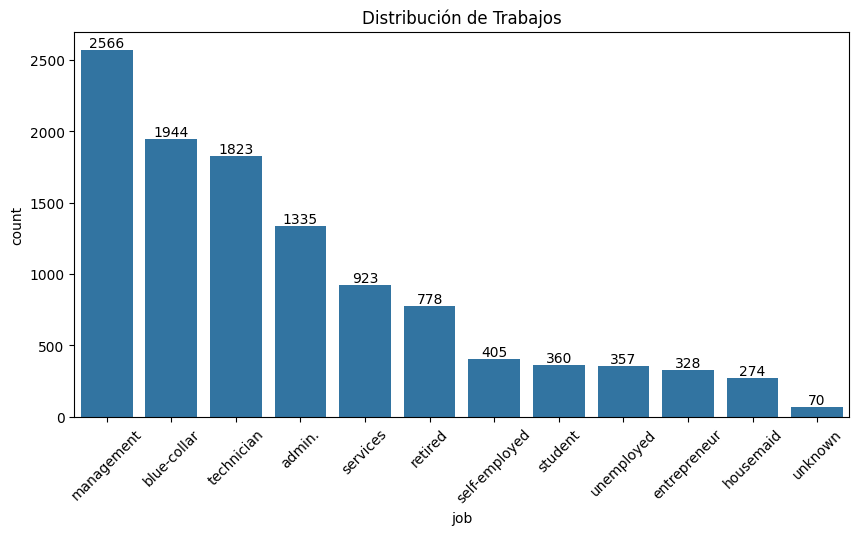

In [ ]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_BANK_marketing, x='job', order=df_BANK_marketing['job'].value_counts().index)
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de Trabajos')
plt.xticks(rotation=45)
plt.show()

#### Variable marital

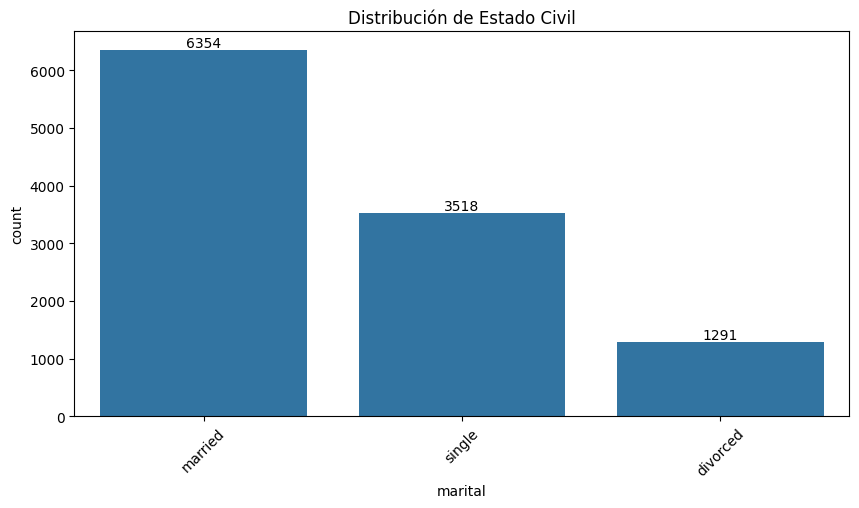

In [ ]:
plt.figure(figsize=(10, 5))
num_marital = sns.countplot(data=df_BANK_marketing, x='marital', order=df_BANK_marketing['marital'].value_counts().index)
for bar in num_marital.containers: # número en las barras
    num_marital.bar_label(bar)
plt.title('Distribución de Estado Civil')
plt.xticks(rotation=45)
plt.show()

#### Variable education

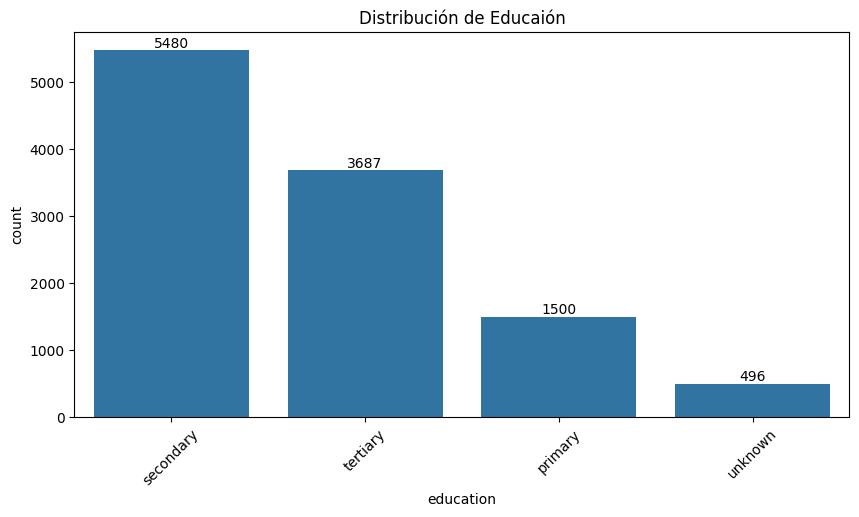

In [ ]:
plt.figure(figsize=(10, 5))
num_education = sns.countplot(data=df_BANK_marketing, x='education', order=df_BANK_marketing['education'].value_counts().index)
for bar in num_education.containers: # número en las barras
    num_education.bar_label(bar)
plt.title('Distribución de Educaión')
plt.xticks(rotation=45)
plt.show()

#### Variable contact

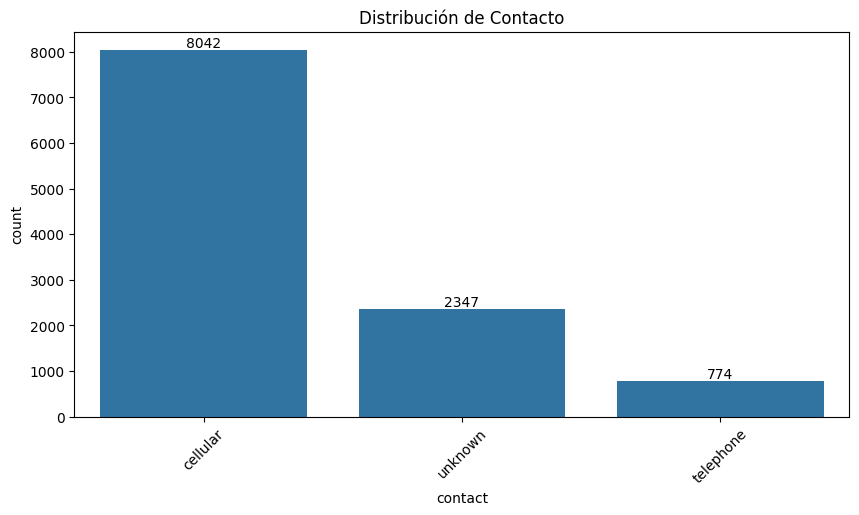

In [ ]:
plt.figure(figsize=(10, 5))
num_contact = sns.countplot(data=df_BANK_marketing, x='contact', order=df_BANK_marketing['contact'].value_counts().index)
for bar in num_contact.containers: # número en las barras
    num_contact.bar_label(bar)
plt.title('Distribución de Contacto')
plt.xticks(rotation=45)
plt.show()

#### Variable month

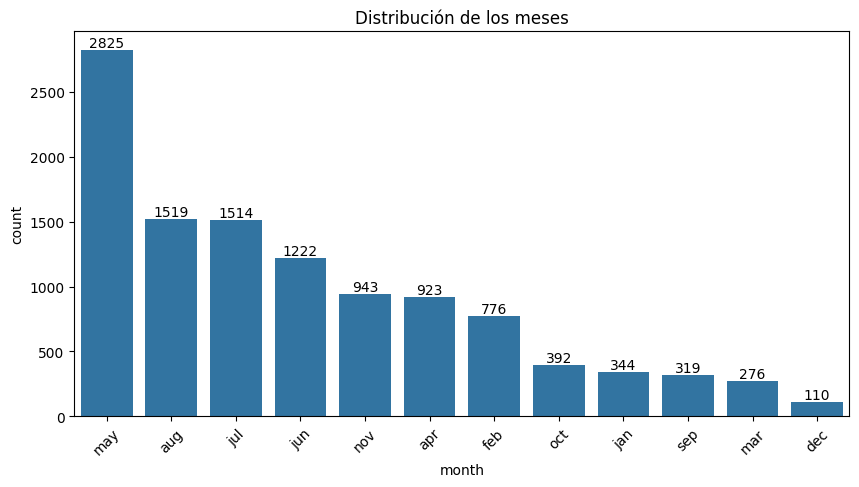

In [ ]:
plt.figure(figsize=(10, 5))
num_month = sns.countplot(data=df_BANK_marketing, x='month', order=df_BANK_marketing['month'].value_counts().index)
for bar in num_month.containers: # número en las barras
    num_month.bar_label(bar)
plt.title('Distribución de los meses')
plt.xticks(rotation=45)
plt.show()

#### Variable poutcome

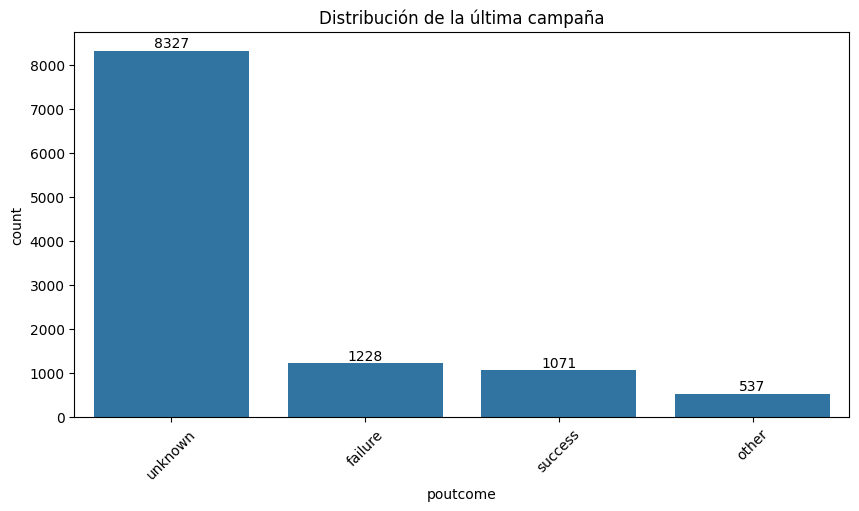

In [ ]:
plt.figure(figsize=(10, 5))
num_poutcome = sns.countplot(data=df_BANK_marketing, x='poutcome', order=df_BANK_marketing['poutcome'].value_counts().index)
for bar in num_poutcome.containers: # número en las barras
    num_poutcome.bar_label(bar)
plt.title('Distribución de la última campaña')
plt.xticks(rotation=45)
plt.show()

### ANÁLISIS VARIABLES NUMÉRICAS

#### Variable balance

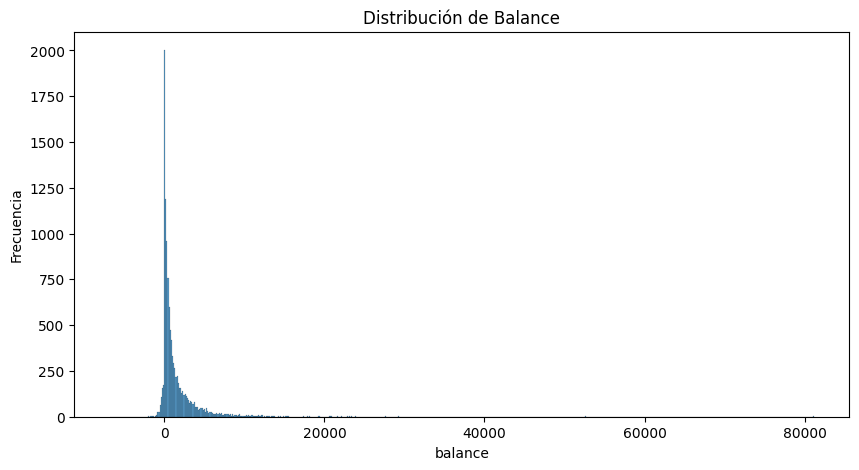

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['balance'])
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

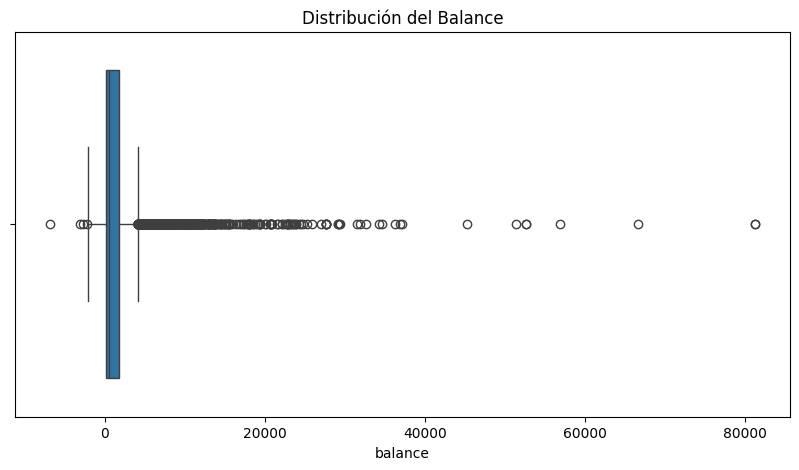

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='balance')
plt.title('Distribución del Balance')
plt.show()

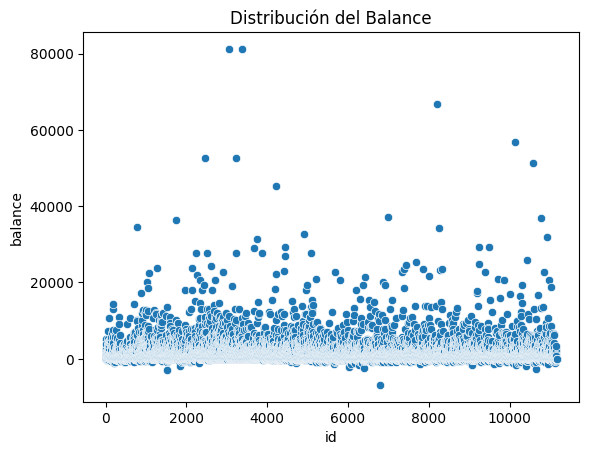

In [ ]:
sns.scatterplot(x="id", y="balance", data=df_BANK_marketing)
plt.title("Distribución del Balance")
plt.show()

In [ ]:
df_BANK_marketing['balance'].value_counts()

balance
 0        774
 1         39
 3         35
 2         34
 4         29
         ... 
 9447       1
 1924       1
 5806       1
 20138      1
-134        1
Name: count, Length: 3805, dtype: int64

#### Variable duration

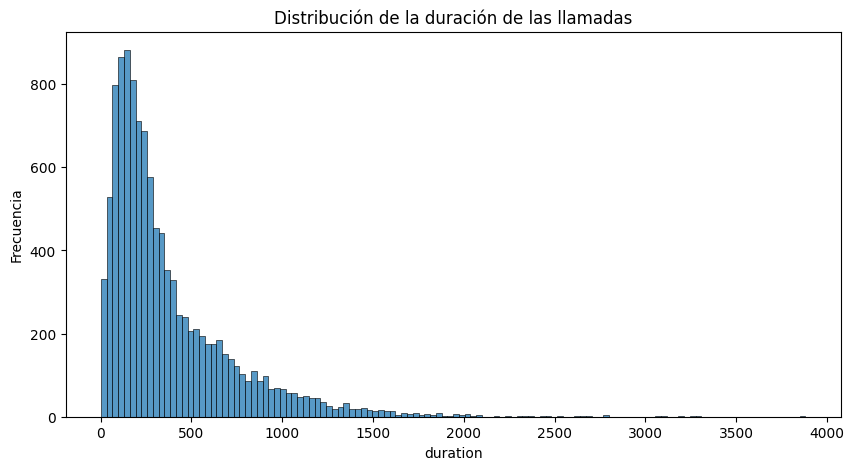

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['duration'])
plt.title('Distribución de la duración de las llamadas')
plt.xlabel('duration')
plt.ylabel('Frecuencia')
plt.show()

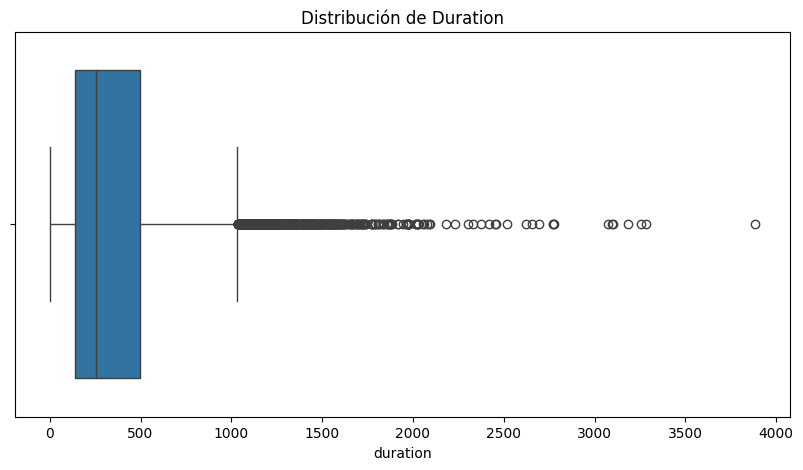

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='duration')
plt.title('Distribución de Duration')
plt.show()

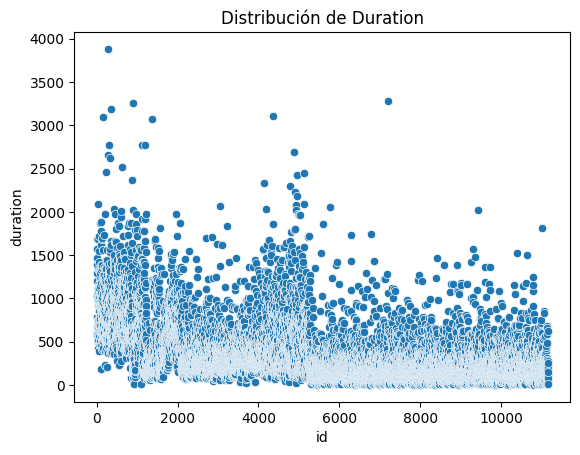

In [ ]:
sns.scatterplot(x="id", y="duration", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [ ]:
df_BANK_marketing['duration'].value_counts()

duration
97      39
161     38
119     37
150     37
158     37
        ..
1730     1
791      1
1211     1
1011     1
1812     1
Name: count, Length: 1428, dtype: int64

#### Variable campaign

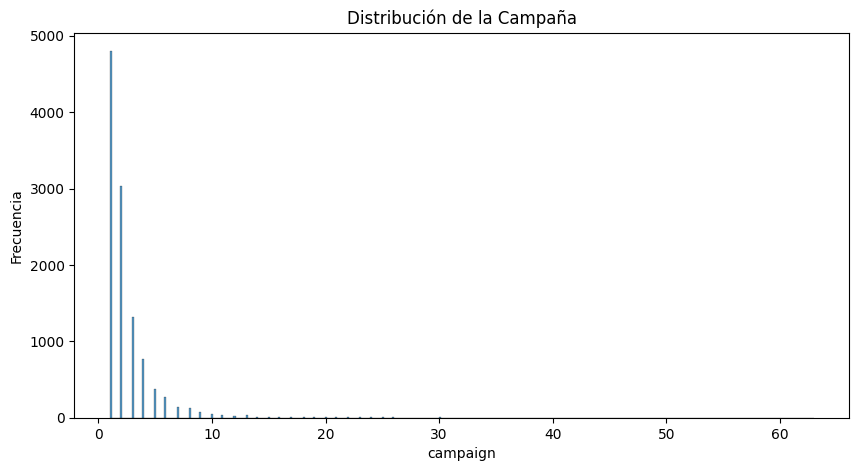

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['campaign'])
plt.title('Distribución de la Campaña')
plt.xlabel('campaign')
plt.ylabel('Frecuencia')
plt.show()

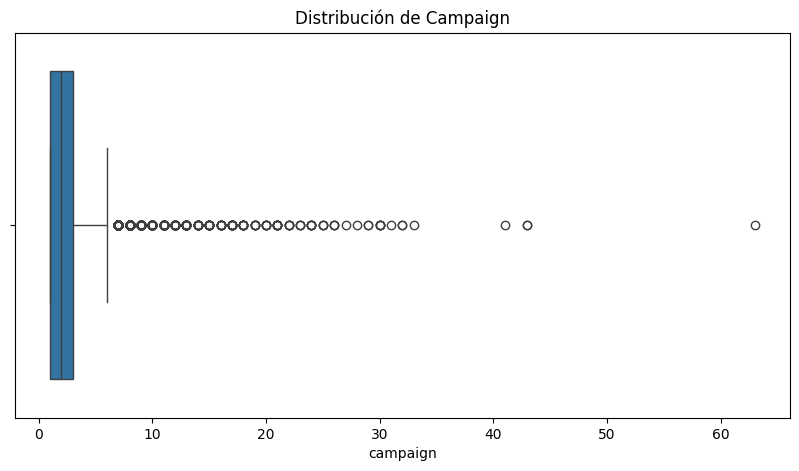

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='campaign')
plt.title('Distribución de Campaign')
plt.show()

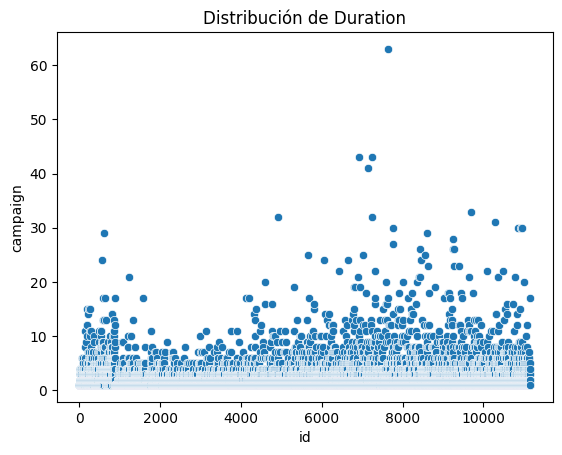

In [ ]:
sns.scatterplot(x="id", y="campaign", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [ ]:
df_BANK_marketing['campaign'].value_counts()

campaign
1     4799
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: count, dtype: int64

#### Variable age

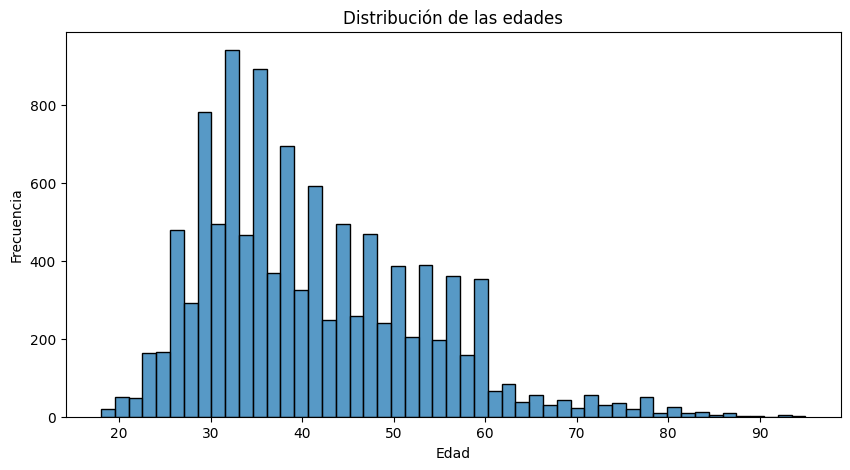

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['age'])
plt.title('Distribución de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

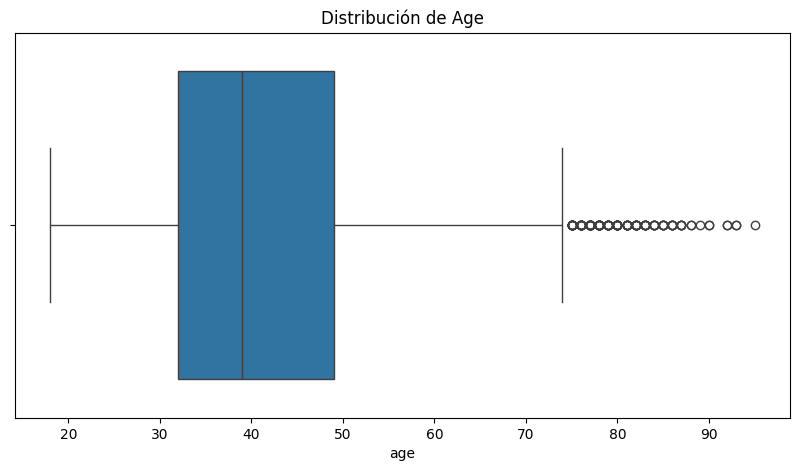

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='age')
plt.title('Distribución de Age')
plt.show()

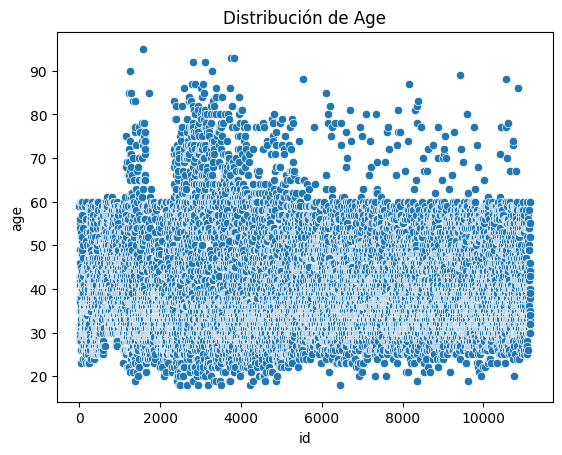

In [ ]:
sns.scatterplot(x="id", y="age", data=df_BANK_marketing)
plt.title("Distribución de Age")
plt.show()

In [ ]:
df_BANK_marketing['age'].value_counts()

age
31.0    496
32.0    476
33.0    466
34.0    466
35.0    461
       ... 
92.0      2
93.0      2
88.0      2
95.0      1
89.0      1
Name: count, Length: 76, dtype: int64

#### Variable pdays

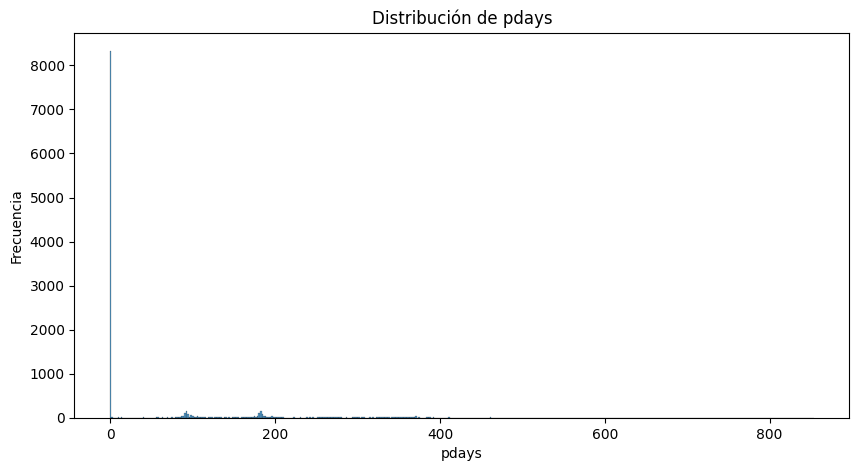

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['pdays'])
plt.title('Distribución de pdays')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.show()

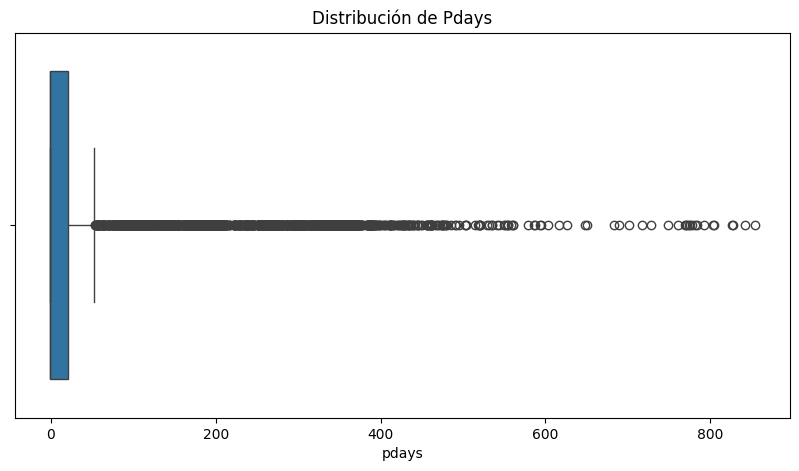

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='pdays')
plt.title('Distribución de Pdays')
plt.show()

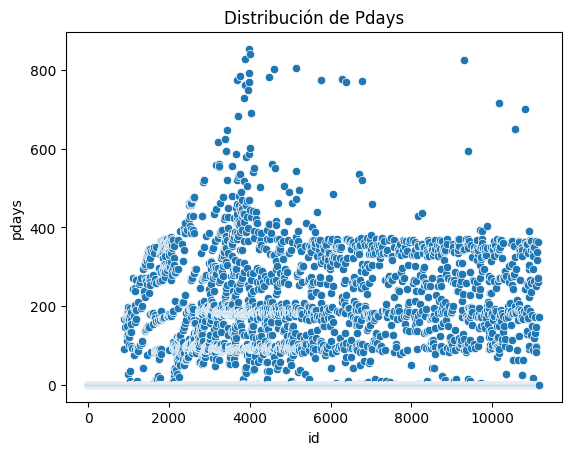

In [ ]:
sns.scatterplot(x="id", y="pdays", data=df_BANK_marketing)
plt.title("Distribución de Pdays")
plt.show()

In [ ]:
df_BANK_marketing['pdays'].value_counts()

pdays
-1      8325
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

#### Variable previous

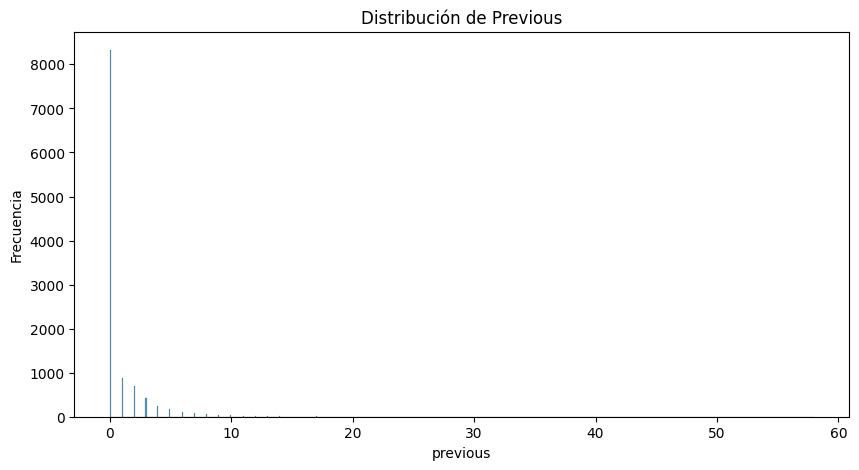

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['previous'])
plt.title('Distribución de Previous')
plt.xlabel('previous')
plt.ylabel('Frecuencia')
plt.show()

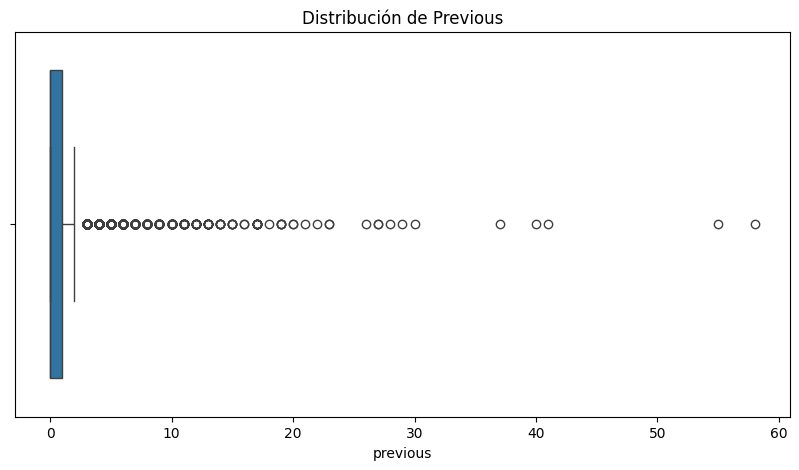

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='previous')
plt.title('Distribución de Previous')
plt.show()

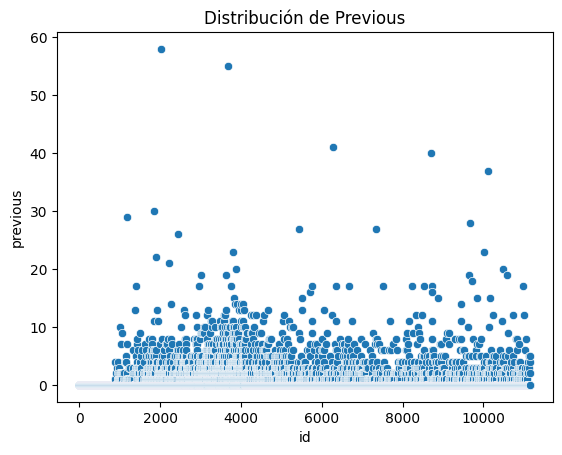

In [ ]:
sns.scatterplot(x="id", y="previous", data=df_BANK_marketing)
plt.title("Distribución de Previous")
plt.show()

In [ ]:
df_BANK_marketing['previous'].value_counts()

previous
0     8325
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: count, dtype: int64

### ANÁLISIS VARIABLES BOOLEANS

#### Variable is_in_default

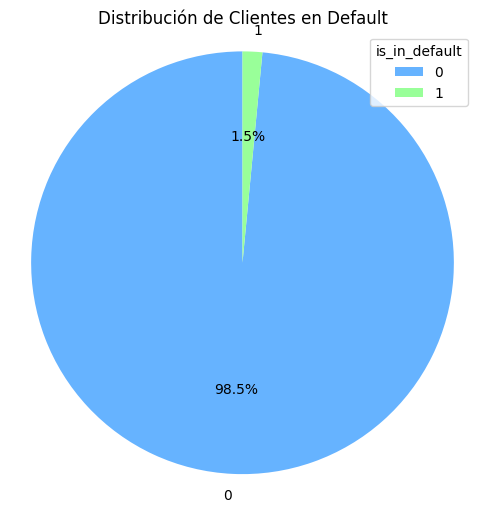

In [31]:
default_counts = df_BANK_marketing['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes en Default')
plt.legend(default_counts.index, title="is_in_default", loc="best")
plt.axis('equal')  
plt.show()

#### Variable housing

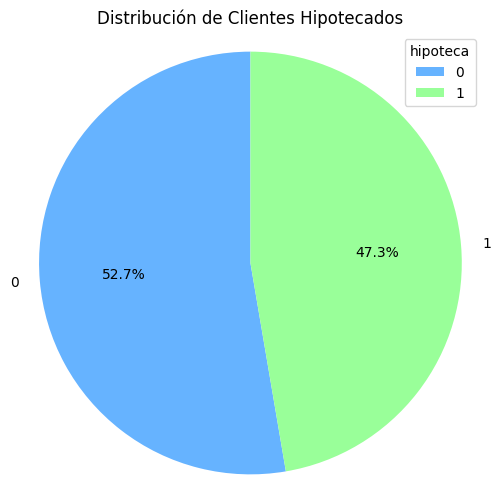

In [34]:
housing_counts = df_BANK_marketing['housing'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes Hipotecados')
plt.legend(default_counts.index, title="hipoteca", loc="best")
plt.axis('equal')  
plt.show()

#### Variable loan

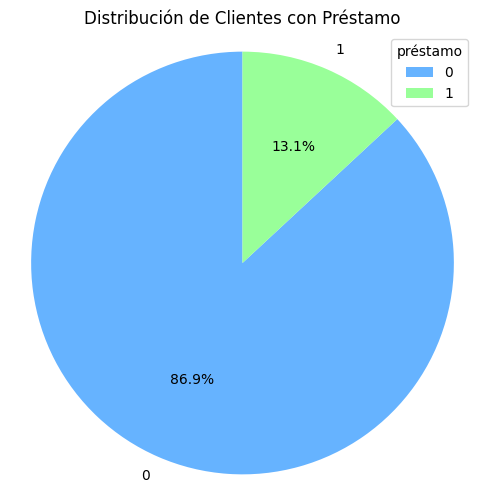

In [35]:
loan_counts = df_BANK_marketing['loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Préstamo')
plt.legend(loan_counts.index, title="préstamo", loc="best")
plt.axis('equal')  
plt.show()